In [2]:
a=[0,0,1,1,0,0,
  0,1,0,0,1,0,
  1,1,1,1,1,1,
  1,0,0,0,0,1,
  1,0,0,0,0,1]
b=[0,1,1,1,1,0,
  0,1,0,0,1,0,
  0,1,1,1,1,1,
  0,1,0,0,1,0,
  0,1,1,1,1,0]
c=[0,1,1,1,1,0,
  0,1,0,0,0,0,
  0,1,0,0,0,0,
  0,1,0,0,0,0,
   0,1,1,1,1,0]

In [3]:
y=[[1,0,0],
  [0,1,0],
  [0,0,1]]

In [4]:
import numpy as np
import matplotlib.pyplot as plt

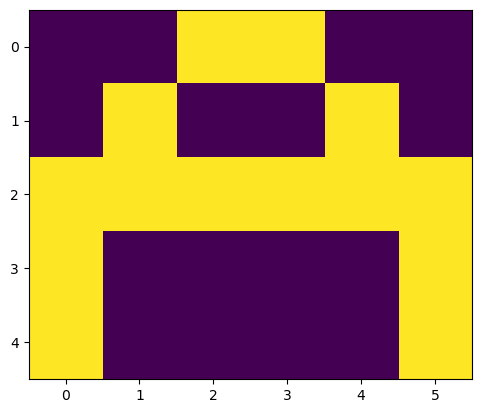

In [5]:
plt.imshow(np.array(a).reshape(5,6))
plt.show()

In [6]:
x=[np.array(a).reshape(1,30),np.array(b).reshape(1,30), np.array(c).reshape(1,30)]
y=np.array(y)
print(x,'\n\n',y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [7]:
def sigmoid(x):
    return (1/(1+np.exp(-x)))

In [8]:
def forward(x,w1,w2):
    z1=x.dot(w1)
    a1=sigmoid(z1)
    z2=a1.dot(w2)
    a2=sigmoid(z2)
    return(a2)

In [9]:
def generate(x,y):
    l=[]
    for i in range(x*y):
        l.append(np.random.randn())
    return(np.array(l).reshape(x,y))

In [10]:
def loss(out,Y):
    s=(np.square(out-Y))
    s=np.sum(s)/len(y)
    return s

In [11]:
def back_propagation(x,y,w1,w2,alpha):
    z1=x.dot(w1)
    a1=sigmoid(z1)
    z2=a1.dot(w2)
    a2=sigmoid(z2)
    d2=(a2-y)
    d1 = np.multiply((w2.dot(d2.transpose())).transpose(), np.multiply(a1, 1 - a1))
    w1_adj=x.transpose().dot(d1)
    w2_adj=a1.transpose().dot(d2)
    w1=w1-(alpha*(w1_adj))
    w2=w2-(alpha*(w2_adj))
    return (w1,w2)

In [12]:
def train(x, Y, w1, w2, alpha=0.01, epoch=10):
    acc = []
    losses = []  # Renamed to avoid conflict with the loss function
    for j in range(epoch):
        l = []
        for i in range(len(x)):
            out = forward(x[i], w1, w2)  # Corrected indexing
            l.append(loss(out, Y[i]))  # Ensure loss function is used correctly
            w1, w2 = back_propagation(x[i], Y[i], w1, w2, alpha)  # Consistent variable names
        print("Epochs: ", j+1, "acc:", (1 - sum(l) / len(x)) * 100)
        acc.append((1 - sum(l) / len(x)) * 100)
        losses.append(sum(l) / len(x))
    return (acc, losses, w1, w2)

In [13]:
def predict(x,w1,w2):
    Out=forward(x,w1,w2)
    maxm=0
    k=0
    for i in range(len(Out[0])):
        if(maxm<Out[0][i]):
            maxm=Out[0][i]
            k=i
    if(k==0):
        print("Image is of letter A")
    elif(k==1):
        print("IMage is of letter B")
    else:
        print("Image is of letter C")
    plt.imshow(x.reshape(5,6))
    plt.show()

In [14]:
w1=generate(30,5)
w2=generate(5,3)
print(w1,"\n",w2)

[[ 0.50664831  1.11713336 -0.93273528  0.98289159  0.08037699]
 [ 0.01497374 -0.79285388  1.19691609  0.1159622  -0.24464947]
 [ 0.67151423  1.31093682 -0.70743607  1.18801792  0.1395281 ]
 [ 0.50445615 -1.47580367 -0.05749458  0.3065981  -0.30538432]
 [ 1.34269935 -0.12541032  0.70283775  0.9761699   0.86152429]
 [ 0.87332823 -0.08518488  0.32248171 -0.88982307 -0.70318313]
 [-1.33964345 -0.35216127 -0.50470721  1.21207666  0.38285389]
 [ 0.42260096  1.4841843  -0.33512243  0.09407304 -1.44420924]
 [ 1.47542525 -1.67180493  0.62548173  0.13414806  0.28266578]
 [-0.97107997  2.56023437 -1.30068616 -0.63794444  1.24705009]
 [ 0.55234085  0.53277648 -0.41545302  0.3816331   0.56328571]
 [ 0.77649364  0.23569808 -0.47422249 -0.70946367  0.51889677]
 [-1.80179309 -0.27051855 -0.06381571 -0.49383924  0.38309022]
 [ 0.29192218  0.54055627 -1.03690536  0.37452826  0.98147425]
 [-1.43699606 -0.58720035 -0.35565376  0.91294592  0.66238051]
 [ 0.13612809  1.63131065 -0.42790451  1.54956041 -1.08

In [15]:
acc,loss,w1,w2=train(x,y,w1,w2,0.1,100)

Epochs:  1 acc: 74.4597837569603
Epochs:  2 acc: 76.15644428174191
Epochs:  3 acc: 77.63772523380511
Epochs:  4 acc: 78.95258000771868
Epochs:  5 acc: 80.13922956929946
Epochs:  6 acc: 81.2203943619534
Epochs:  7 acc: 82.20499789438303
Epochs:  8 acc: 83.09383921658102
Epochs:  9 acc: 83.88680624841534
Epochs:  10 acc: 84.58824058965246
Epochs:  11 acc: 85.20795419004426
Epochs:  12 acc: 85.7588151921211
Epochs:  13 acc: 86.25377737244224
Epochs:  14 acc: 86.70410337144216
Epochs:  15 acc: 87.11883573701226
Epochs:  16 acc: 87.50495018126337
Epochs:  17 acc: 87.86773702666065
Epochs:  18 acc: 88.2111907748167
Epochs:  19 acc: 88.53833427617809
Epochs:  20 acc: 88.85146781491335
Epochs:  21 acc: 89.15235432270353
Epochs:  22 acc: 89.44235556845221
Epochs:  23 acc: 89.72253225030204
Epochs:  24 acc: 89.99371790246914
Epochs:  25 acc: 90.2565738419429
Epochs:  26 acc: 90.51163031953746
Epochs:  27 acc: 90.75931755193513
Epochs:  28 acc: 90.99998926311606
Epochs:  29 acc: 91.23394063034716

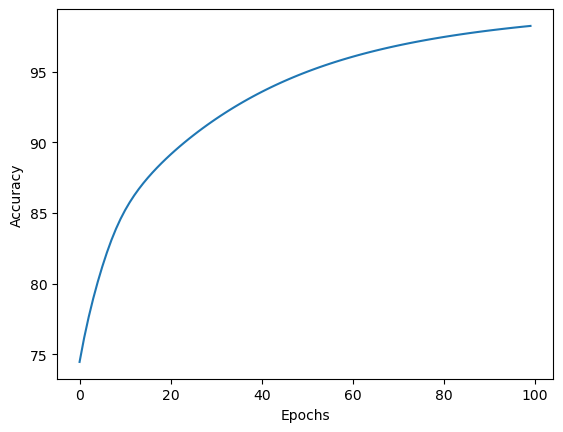

In [16]:
plt.plot(acc)
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.show()

In [17]:
print(w1,"\n",w2)

[[ 5.06648309e-01  1.11713336e+00 -9.32735280e-01  9.82891588e-01
   8.03769853e-02]
 [-1.40206113e-03 -6.92939054e-01  1.46953878e+00  2.21465721e-01
  -5.58491290e-01]
 [ 6.04577195e-01  7.97588920e-01 -4.91291114e-01  1.30942088e+00
  -1.80895537e-01]
 [ 4.37519121e-01 -1.98915157e+00  1.58650380e-01  4.28001062e-01
  -6.25807963e-01]
 [ 1.32632356e+00 -2.54954978e-02  9.75460439e-01  1.08167342e+00
   5.47682468e-01]
 [ 8.73328234e-01 -8.51848756e-02  3.22481707e-01 -8.89823071e-01
  -7.03183129e-01]
 [-1.33964345e+00 -3.52161271e-01 -5.04707211e-01  1.21207666e+00
   3.82853891e-01]
 [ 3.55663933e-01  9.70836398e-01 -1.18977468e-01  2.15475993e-01
  -1.76463288e+00]
 [ 1.47542525e+00 -1.67180493e+00  6.25481734e-01  1.34148057e-01
   2.82665781e-01]
 [-9.71079972e-01  2.56023437e+00 -1.30068616e+00 -6.37944442e-01
   1.24705009e+00]
 [ 1.29763166e-01  5.14364858e-01 -1.61296480e-01  3.96557724e-01
   1.13533399e+00]
 [ 7.76493642e-01  2.35698083e-01 -4.74222488e-01 -7.09463673e-01

Image is of letter C


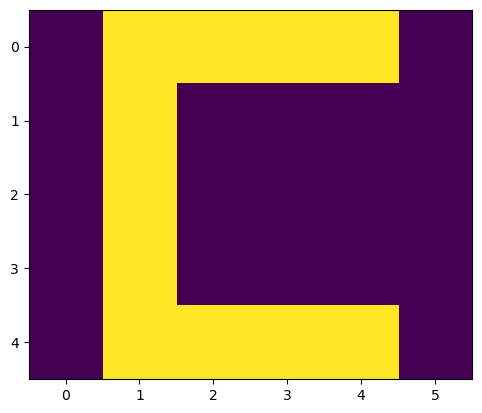

In [18]:
predict(x[2],w1,w2)

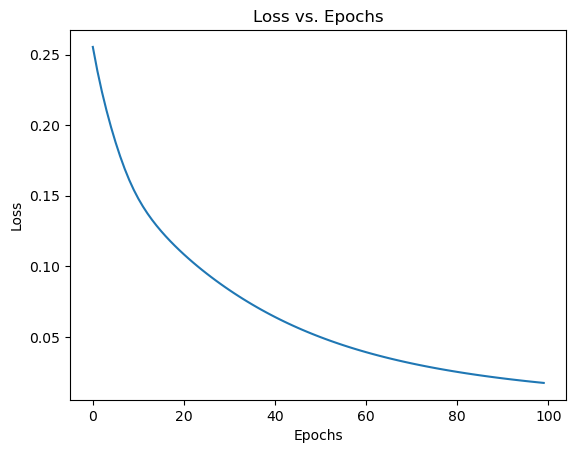

In [20]:
# Plotting the loss graph
plt.plot(loss)
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.title("Loss vs. Epochs")
plt.show()